<a href="https://colab.research.google.com/github/jonialon/intro-ml-python/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, r2_score

# Scikit-Learn

## Scikit-Learn — Data Representation

- Data is represented by a two-dimensional grid, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
- Each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. We will refer to the rows of the matrix as **samples**, and the number of rows as **n_samples**.
- Each column of the data refers to a particular quantitative piece of information that describes each sample. We will refer to the columns of the matrix as **features**, and the number of columns as **n_features**.


### Scikit-Learn — Data Representation — Features Matrix

- The **features matrix** is two-dimensional, with shape **[n_samples, n_features]**, and is most often contained in a NumPy array or a Pandas DataFrame, though some Scikit-Learn models also accept SciPy sparse matrices.
- The **samples** (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.
- The **features** (i.e., columns) refer to the distinct observations that describe each sample in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.
- By convention, the **features matrix** is often stored in a variable named **X**.

### Scikit-Learn — Data Representation — Target Vector

- The **target array** is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series.
- The **target array** may have continuous numerical values, or discrete classes/labels. (While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, **[n_samples, n_targets]** target array, we will primarily be working with the common case of a one-dimensional target array.)
- By convention, the target vector is often stored in a variable named **y**.


## Scikit-Learn — API Basics

The steps in using the Scikit-Learn API are as follows:
1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data:
  - For supervised learning, often we predict labels and values for unknown data using the `predict()` method.
  - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.
6. Evaluate the model on the test data using Scikit-Learn `metrics` - classification accuracy for classification and MSE or R2 for regression.  


## Scikit-Learn Guiding Principles

- The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](https://arxiv.org/abs/1309.0238):
- **Consistency**: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
- **Inspection**: All specified parameter values are exposed as public attributes.
- **Limited object hierarchy**: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.
- **Composition**: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
- **Sensible defaults**: When models require user-specified parameters, the library defines an appropriate default value.


## Scikit-learn Datasets

https://scikit-learn.org/stable/datasets.html  

In [2]:
# import some data to play with
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
type(iris.data)

numpy.ndarray

In [5]:
iris.data.shape

(150, 4)

In [6]:
type(iris.target)

numpy.ndarray

In [7]:
iris.target.shape

(150,)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.filename

'iris.csv'

In [12]:
iris.data_module

'sklearn.datasets.data'

# Classification

## K Nearest Neighbors (k-NN)

- k-NN is the simplest supervised machine learning algorithm.
- The K-nearest neighbor or k-NN is an algorithm to recognize the pattern in each dataset without explicitly learning a model.
- k-NN is a non-parametric method to predict the output value based on k closest training examples.
- **k-NN classification**: The objective is to classify an unknown object by finding the most common class nearest to its features.
- **k-NN regression**: The output is based on the mean or the median of the K-most similar instances.

- Pros:
  - Simple to implement.
  - Training is trivial.
  - It can work with any number of classes.
  - Easy to add more data.
  - It has very few hyperparameters (K and distance metric).
- Cons:
  - It has high computation cost.
  - It is not suitable for high dimensional data and categorical features.

### k-NN Implementation

- k-NN is not explicitly learning a model and predicting the output by looking at all the examples together.
- It makes the algorithm simple with minimal training phase but computationally costly during test time since classifying a given observation requires a rundown of the whole data set. The prediction algorithm works as follows:  
  1. Calculate the distance from ‘x’ to all points in your data.
  2. Sort the points in your data by increasing distance from x.
  3. Predict the majority label of the “k” closest points.

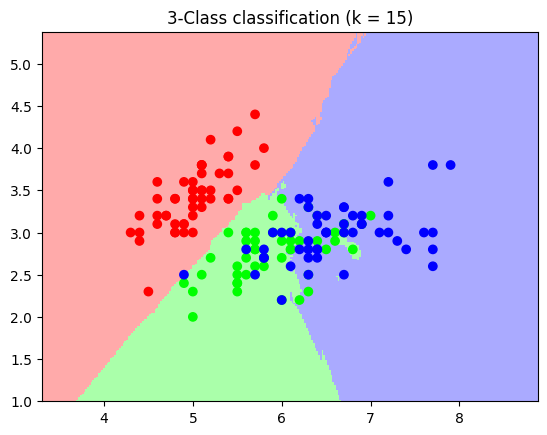

In [13]:
n_neighbors = 15

# Import some data to play with
iris = datasets.load_iris()
# We only take the first two features
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# We create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# Create mesh grid of points (xx[i,j] yy[i,j])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

# Predict the class Z[i,j] for every point (xx[i,j], yy[i,j])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"% (n_neighbors))

plt.show()

# Regression

- Regression searches for relationships among variables.
- For example, how **target** salary depends on **features**, such as experience, level of education, role, city employee works in, and so on.
- This is a regression problem where data related to each employee represent one **observation**. The presumption is that the experience, education, role, and city are the **independent** features, while the salary **depends** on them.
- As another example, how **target** house price depends on **features**, such as area, number of bedrooms, distance to the city center, and so on.
- Generally, in regression analysis, you need to find a function that maps some features or variables to others sufficiently well.
- The dependent features are called the **dependent variables**, **outputs**, **responses**, or **targets**.
- The independent features are called the **independent variables**, **inputs**, **predictors**, or **features**.


## Linear Regression

- Linear regression is probably one of the most important and widely used regression techniques.
- Linear regression is among the simplest regression methods.
# - One of its main advantages is the ease of interpreting results.

- The linear regression equation is given by:  
$y = b_0 + b_1 * x + \epsilon$, where
- x is the predictor (independent) variable  
- y is the target (dependent) variable
- b0 and b1 are the regression **coefficients** or **parameters**  
  - b0 is the **intercept**  
  - b1 is the **slope**  

- **Fit** — given a training set - pairs of data points $\{(x_i, y_i)\}_{i=1 : n}$ estimate or find the best $(b_0, b_1)$ that minimize the sum of square residuals $SSR = \Sigma_i (y_i - (b_0 + b_1 * x_i))^2 $. This approach is called the method of **ordinary least squares**.
- **Predict** — given a new observation $x_{test}$ find $y_{pred} = b_0 + b_1*x_{test}$  

In [14]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients (slope): \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients (slope): 
 [938.23786125]
Intercept: 
 152.91886182616113
Mean squared error: 2548.07
Coefficient of determination: 0.47


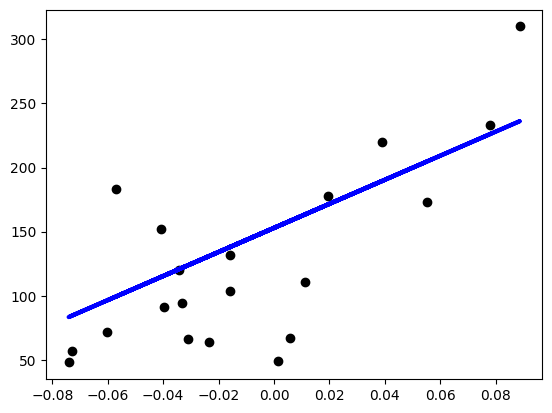

In [15]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.axis('equal')
plt.show()